In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy.signal import find_peaks
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from FeatureStatCalulateFile import FeatureStat
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

In [2]:
# Preview of the Data: 
# Reading the data into a pandas data frame with defined column names and dropping null values will allow us to achive the processing above
# Define column names
column_names = ['user', 'activity', 'timestamp', 'x-axis', 'y-axis', 'z-axis']
# Read the file, skipping bad lines
data = pd.read_csv('data/WISDM_ar_v1.1_raw.txt', sep=',', names=column_names, on_bad_lines='skip')
# drop null values: 
data = data.dropna()

data['z-axis'] = data['z-axis'].str.rstrip(';').astype(float)

In [3]:
df_8 = data[data['user'] == 8]

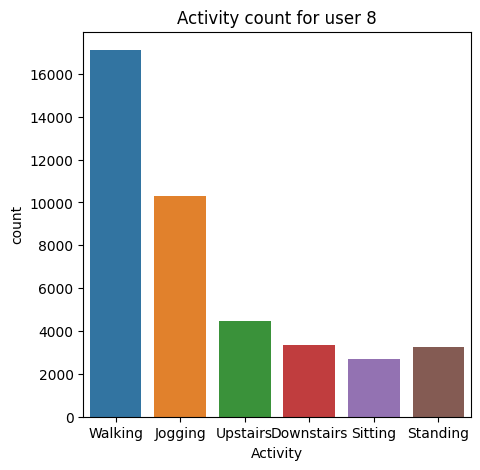

In [4]:
plt.figure(figsize=(5,5))
sns.countplot(x='activity', data=df_8, hue='activity')
plt.xlabel('Activity')
plt.title('Activity count for user 8')
plt.show()

In [5]:
# create window sizes: 

def get_windows(df, window_size, step_size):

    x_list = []
    y_list = []
    z_list = []
    activity_list = []
    for i in range(0, df.shape[0] - window_size, step_size):
        xs = df['x-axis'].values[i : i + window_size]
        ys = df['y-axis'].values[i : i + window_size]
        zs = df['z-axis'].values[i : i + window_size]
        label = df['activity'][i : i + window_size].mode()[0]

        x_list.append(xs)
        y_list.append(ys)
        z_list.append(zs)
        activity_list.append(label)
    return x_list, y_list, z_list, activity_list

In [32]:
X = pd.DataFrame()

In [33]:
x_list, y_list, z_list, activity_list = get_windows(df_8, 60, 60)

In [34]:
featured_data = FeatureStat(X, x_list, y_list, z_list)

In [35]:
X = featured_data.all()

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
y = pd.Series(activity_list)  # Corresponding labels

# Step 3: Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

# Verify the splits
print("Train set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Train set shape: (548, 59) (548,)
Test set shape: (138, 59) (138,)


In [38]:
scaler = StandardScaler()
X_train  = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [41]:
decisionTree = DecisionTreeClassifier(max_depth=5, random_state=529)
decisionTree.fit(X_train, y_train)
dT_yPred = decisionTree.predict(X_test)
dT_accuracy = accuracy_score(y_test, dT_yPred)
print(f'Accuracy of Decision Tree on user 8 dataset is {dT_accuracy*100:.2f}')
print("\n------------------ Decision Tree Classification Report - WISDM data -------------------\n")
print(classification_report(y_test, dT_yPred))

Accuracy of Decision Tree on user 8 dataset is 92.75

------------------ Decision Tree Classification Report - WISDM data -------------------

              precision    recall  f1-score   support

  Downstairs       0.85      1.00      0.92        11
     Jogging       1.00      0.97      0.99        34
     Sitting       1.00      1.00      1.00         9
    Standing       1.00      1.00      1.00        11
    Upstairs       0.67      0.80      0.73        15
     Walking       0.96      0.90      0.93        58

    accuracy                           0.93       138
   macro avg       0.91      0.94      0.93       138
weighted avg       0.94      0.93      0.93       138



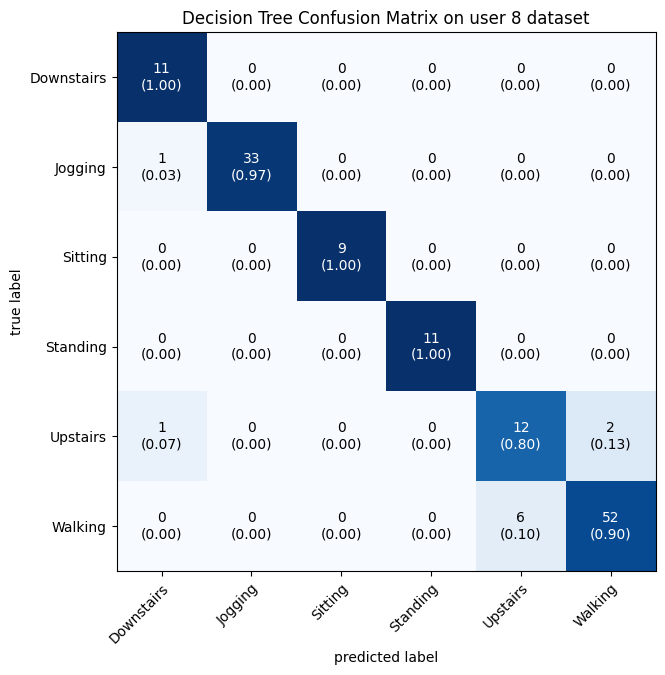

In [42]:
dT_cm = confusion_matrix(y_test, dT_yPred)
plot_confusion_matrix(dT_cm, class_names=decisionTree.classes_, show_normed=True, figsize=(7,7))
plt.title("Decision Tree Confusion Matrix on user 8 dataset")
plt.show()

In [44]:
randomForest = RandomForestClassifier(n_estimators=50, max_depth=5,random_state=529)
randomForest.fit(X_train, y_train)
rF_yPred = randomForest.predict(X_test)
rF_accuracy = accuracy_score(y_true=y_test, y_pred=rF_yPred)
print(f'Accuracy of Random Forest on user 8 dataset is {rF_accuracy*100:.2f}')
print("\n------------------ Random Forest Classification Report - user 8 data -------------------\n")
print(classification_report(y_test, rF_yPred))


Accuracy of Random Forest on user 8 dataset is 97.10

------------------ Random Forest Classification Report - user 8 data -------------------

              precision    recall  f1-score   support

  Downstairs       1.00      0.91      0.95        11
     Jogging       1.00      1.00      1.00        34
     Sitting       1.00      1.00      1.00         9
    Standing       1.00      1.00      1.00        11
    Upstairs       0.82      0.93      0.88        15
     Walking       0.98      0.97      0.97        58

    accuracy                           0.97       138
   macro avg       0.97      0.97      0.97       138
weighted avg       0.97      0.97      0.97       138



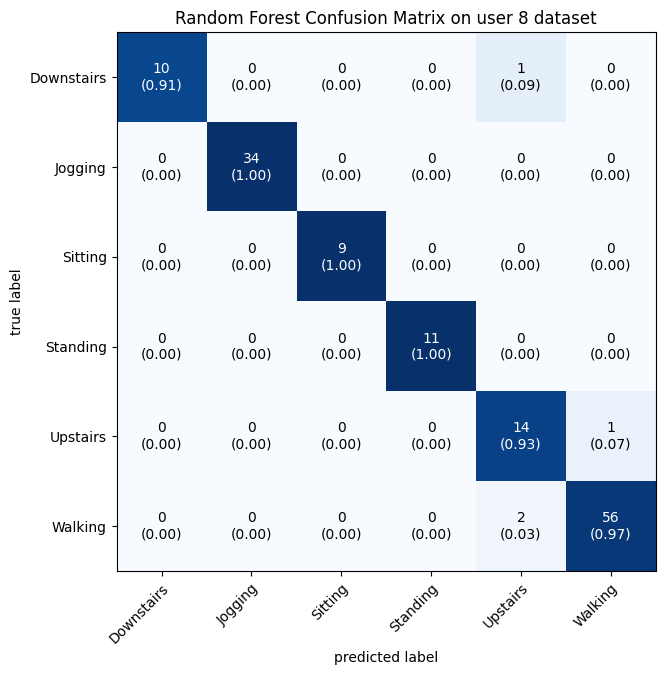

In [45]:
rF_cm = confusion_matrix(y_test, rF_yPred)
plot_confusion_matrix(rF_cm, class_names=decisionTree.classes_, show_normed=True, figsize=(7,7))
plt.title("Random Forest Confusion Matrix on user 8 dataset")
plt.show()